In [13]:
import numpy as np
import matplotlib.pyplot as plt

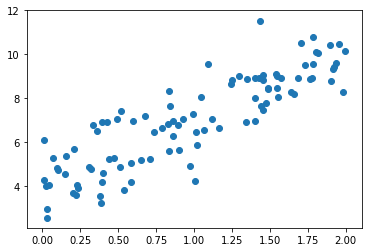

In [21]:
np.random.seed(666)
x = 2 * np.random.random(size=100)
y = x * 3. + 4. + np.random.normal(size=100)

X = x.reshape(-1,1)

plt.scatter(x, y)

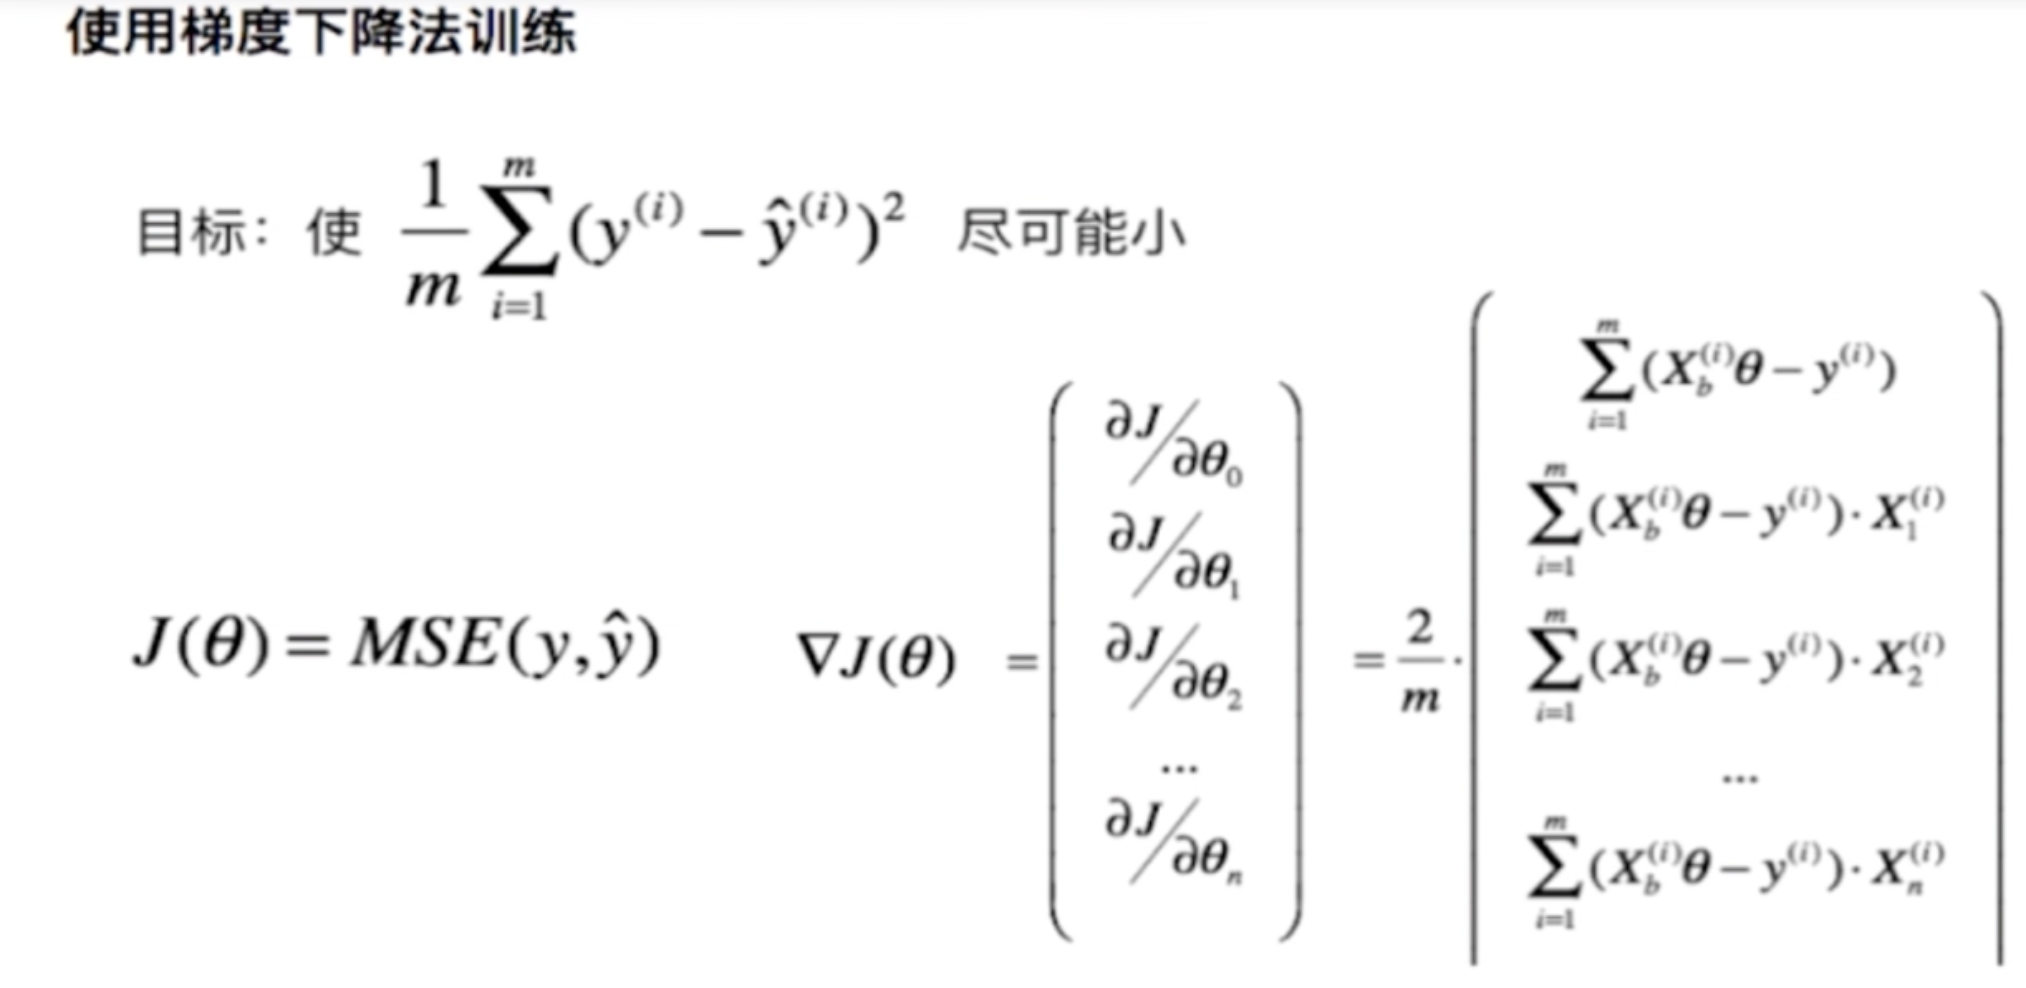

In [29]:
def J(theta, X_b, y):
    '''lose function'''
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        return float('inf')

def dJ(theta, X_b, y):
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:,i])
    return res * 2 / len(X_b)

In [43]:
def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e3, epsilon=1e-8):
    theta = initial_theta 
    i_iter = 0
    while i_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        
        if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
        i_iter += 1
    return theta

In [44]:
X_b = np.hstack([np.ones((len(x),1)), x.reshape(-1,1)])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01

theta = gradient_descent(X_b, y, initial_theta, eta)

In [45]:
print(theta)

[ 3.99481236  3.02953666]


## 封装我们的线性回归算法

In [47]:
from playML.LinearRegression import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit_gd(X, y)

LinearRegression()

In [48]:
lin_reg.coef_

array([ 3.00706277])

In [49]:
lin_reg.intercept_

4.021457858204859